# HW2 

### Submitted by  Sapna Maheshwari 

### due on 2/1/2017 at 11:59 pm

<b>Instructions:</b> Write your answers in the empty code cells below.

<b>Penalties:</b> You will incur penalties if:
<ul>
<li>Your code is wrong</li>
<li>Your code does not work on different data</li>
<li>You use for loops (unless explicitly permitted)</li>
</ul>

<b>Grading</b>: I tend to grade each question as 0 (completely wrong), 0.5 (partly wrong), and 1.0 (correct or almost correct)

## Problem 1

Start by executing the following code, which builds a Series of homework grades, called <b>hw1</b>.

In [7]:
import pandas as pd

In [10]:
hw1Data = {'Dorian':7, 
                'Jeannine':6, 
                'Iluminada':2, 
                'Luci':7, 
                'Jenny':8, 
                'Demetria':2, 
                'Michael':6, 
                'Garland':9, 
                'Shelby':1, 
                'Mercy':5}
hw1 = pd.Series(hw1Data,name='HW1',index=['Dorian', 
                                                    'Jeannine',
                                                    'Iluminada',
                                                    'Luci',
                                                    'Jenny',
                                                    'Demetria',
                                                    'Michael',
                                                    'Garland',
                                                    'Shelby',
                                                    'Mercy'])

### Question 1

Sort in inverse alphabetical order those students whose grade is between 3 and 7 included 

In [15]:
a = hw1.sort_index(ascending = False) 
a

Shelby       1
Michael      6
Mercy        5
Luci         7
Jenny        8
Jeannine     6
Iluminada    2
Garland      9
Dorian       7
Demetria     2
Name: HW1, dtype: int64

In [20]:
a[(a >= 3) & (a <= 7)]

Michael     6
Mercy       5
Luci        7
Jeannine    6
Dorian      7
Name: HW1, dtype: int64

### Question 2

We want to normalize the grades so that the worst student gets a 0, the best a 10, and the ranking between students is preserved. How would you do it? 

Solution: Actually, there are two ways of solving this question. In one way, we can simply use the normalization formula which is given below.

In [231]:
hw = (hw1 - hw1[hw1.idxmin()])/ (hw1[hw1.idxmax()] - hw1[hw1.idxmin()]) *10
hw

Dorian        7.50
Jeannine      6.25
Iluminada     1.25
Luci          7.50
Jenny         8.75
Demetria      1.25
Michael       6.25
Garland      10.00
Shelby        0.00
Mercy         5.00
Name: HW1, dtype: float64

Second way is to simply change the value of highest and lowest grade students which will also not effect the ranking between the students.

In [232]:
hw1['Shelby'] = 0
hw1['Garland'] = 10
hw1

Dorian        7
Jeannine      6
Iluminada     2
Luci          7
Jenny         8
Demetria      2
Michael       6
Garland      10
Shelby        0
Mercy         5
Name: HW1, dtype: int64

## Problem 2

Start by executing the following code, which creates a Series object <b>nf</b> of prices of the stock of Apple. 

In [233]:
import pandas as pd
import pandas_datareader.data as web # if this line gives you an error, install pandas_datareader
import datetime    

start = datetime.datetime(2010, 7, 1)
end = datetime.datetime(2017, 1, 26)
df = web.DataReader("AAPL", 'google', start, end)

dates = []
for x in range(len(df)):
    newdate = str(df.index[x])
    newdate = newdate[0:10]
    dates.append(newdate)
df['dates'] = dates

# Create a Series called nf
nf = df.Close

Populating the interactive namespace from numpy and matplotlib


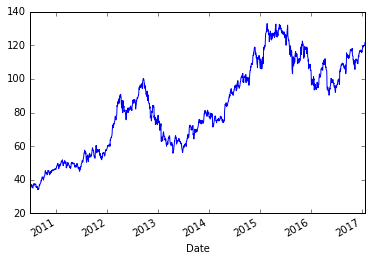

In [234]:
%pylab inline
nf.plot()

### Question 1


What was the price on Dec 31, 2014?

In [235]:
nf['2014-12-31']

110.38

### Question 2

In how many days was the price above 100?

In [236]:
mask = nf[nf > 100]

In [237]:
len(mask)

505

### Question 3

What was the maximum price in 2013? Report both the day and the price.

In [238]:
z = nf.filter(like = '2013', axis = 0)

In [239]:
z.idxmax()

Timestamp('2013-12-23 00:00:00')

In [240]:
nf[z.idxmax()]

81.439999999999998

In [241]:
print 'The maximum price in 2013 was on ' + str(z.idxmax()) + ' with the maximum price of ' + str(nf[z.idxmax()]) + '.'

The maximum price in 2013 was on 2013-12-23 00:00:00 with the maximum price of 81.44.


### Question 4

We want to set an alert that warns us when the price has dropped 18% or more in the past 20 sessions. 
<ul>
<li>In which days is the alert triggered? Report the days in which the alert is triggered and the drop. </li>
<li>Look online for explanations of the most recent drop detected, and summarize in less than 20 words what caused the drop</li>
</ul>

In [242]:
y = ((nf.shift(20)-nf)/nf.shift(20))
y[y >= .18]

Date
2012-11-15    0.191102
2012-11-16    0.181453
2016-01-07    0.184217
2016-05-12    0.194112
Name: Close, dtype: float64

Explanation: 

Apple's stock fell as company revealed its first sales decline since 2003. Drop in iPhone sales, failure of iPhone 6S in generating enthusiasm.